In [13]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from tensorflow.keras.datasets import mnist

In [63]:
(x_trainp, y_train) , (x_test, y_test) = mnist.load_data()
train_morpho = pd.read_csv("Data/train-morpho.csv")
test_morpho = pd.read_csv("Data/t10k-morpho.csv")
labels = pd.read_csv('Data/train_labels.csv')

In [15]:
train_morpho

,index,area,length,thickness,slant,width,height
0,0,107.3125,50.266504,2.460658,0.231074,14.539572,19.849054
1,1,123.2500,51.198485,2.616601,0.331858,15.387810,19.341053
2,2,78.3750,45.927670,1.891592,-0.212196,20.479656,19.114880
3,3,67.3125,22.849242,2.919769,0.509185,5.358179,19.724599
4,4,91.1875,46.284271,2.247425,0.007590,13.275437,19.527523
...,...,...,...,...,...,...,...
59995,59995,102.1875,61.415999,1.941380,0.366472,11.840672,19.937599
59996,59996,108.5625,46.705844,2.538071,0.364359,13.325950,19.688557
59997,59997,87.0625,44.523864,2.058077,0.257784,14.133500,20.070647
59998,59998,82.2500,53.337572,1.667193,0.310377,15.251961,19.692976


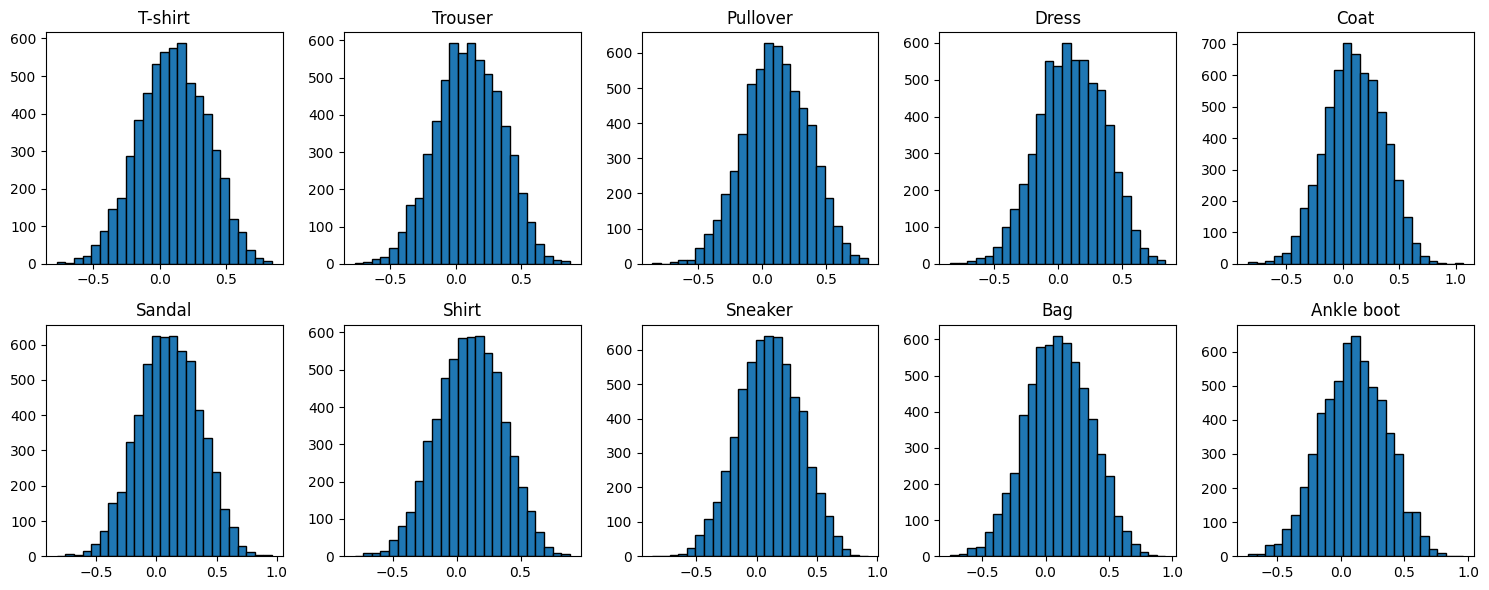

In [16]:
clases = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(15, 6))

for i in range(5):
    ax[0, i].hist(train_morpho['slant'][labels.label.values == i], 25, edgecolor='k')
    ax[0, i].set_title(clases[i])
    
for i in range(5):
    ax[1, i].hist(train_morpho['slant'][labels.label.values == (i+5)], 25, edgecolor='k')
    ax[1, i].set_title(clases[i+5])
    
fig.tight_layout()

plt.show()

In [17]:
slant = train_morpho['slant'].to_numpy()
slant

array([ 0.23107447,  0.33185821, -0.21219623, ...,  0.25778359,
        0.31037662,  0.58877155])

In [18]:
from sklearn.model_selection import train_test_split

x_train, x_val, s_train, s_val = train_test_split(x_trainp, slant, test_size=0.25, random_state=42)
saltear, saltear2, y_train, y_val = train_test_split(x_trainp, y_train, test_size=0.25, random_state=42)

In [41]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, Dropout, Embedding, Concatenate, Input
from tensorflow.keras.optimizers import Adam, Adamax, SGD
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l1, l2

In [55]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(784, activation='relu', kernel_regularizer=l2(0.0001)))
model.add(BatchNormalization(synchronized=True))
model.add(Dense(784/2, activation='relu', kernel_regularizer=l2(0.0001)))
model.add(BatchNormalization(synchronized=True))
model.add(Dense(1))
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_17 (Flatten)        (None, 784)               0         
                                                                 
 dense_46 (Dense)            (None, 784)               615440    
                                                                 
 batch_normalization_30 (Bat  (None, 784)              3136      
 chNormalization)                                                
                                                                 
 dense_47 (Dense)            (None, 392)               307720    
                                                                 
 batch_normalization_31 (Bat  (None, 392)              1568      
 chNormalization)                                                
                                                                 
 dense_48 (Dense)            (None, 1)               

In [56]:
stp = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

model.compile(loss='MAE', optimizer=Adamax(learning_rate=1, weight_decay=0.0005))
history = model.fit(x = x_train, y = s_train, validation_data = (x_val, s_val), epochs=40, batch_size=128, callbacks=[stp])

Epoch 1/40
352/352 [==============================] - 12s 30ms/step - loss: 32.9950 - val_loss: 0.7044
Epoch 2/40
352/352 [==============================] - 23s 65ms/step - loss: 0.6948 - val_loss: 0.7388
Epoch 3/40
352/352 [==============================] - 19s 53ms/step - loss: 0.4327 - val_loss: 2.9391
Epoch 4/40
352/352 [==============================] - 20s 56ms/step - loss: 0.3855 - val_loss: 76.5938
Epoch 5/40
352/352 [==============================] - 14s 40ms/step - loss: 0.2785 - val_loss: 0.2527
Epoch 6/40
352/352 [==============================] - 10s 29ms/step - loss: 0.3692 - val_loss: 0.2731
Epoch 7/40
352/352 [==============================] - 10s 30ms/step - loss: 0.3537 - val_loss: 0.4850
Epoch 8/40
352/352 [==============================] - 11s 31ms/step - loss: 0.3632 - val_loss: 0.6403
Epoch 9/40
352/352 [==============================] - 11s 31ms/step - loss: 0.2394 - val_loss: 0.9554
Epoch 10/40
352/352 [==============================] - 11s 31ms/step - loss: 0.3

KeyboardInterrupt: 

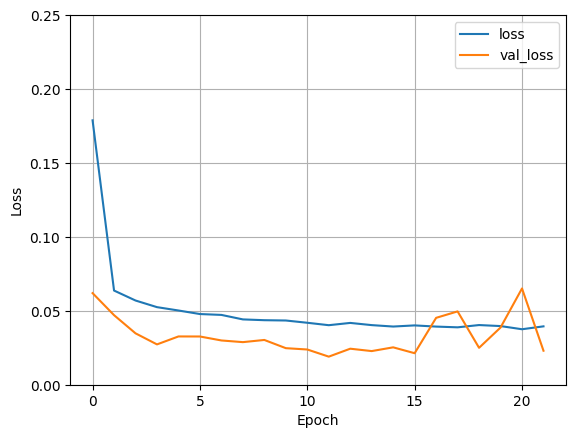

In [27]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.ylim([0, 0.25])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [36]:
y = model.predict(x_val)

469/469 [==============================] - 1s 3ms/step


In [42]:
#for i in range(len(y)):
    #print(s_val[i], y[i])

In [9]:
input1 = Input(shape=(28, 28))

input2 = Input(shape=(1,))

first = Embedding(input_dim=10, output_dim=2, input_length=1)(input2)

flat1 = Flatten(input_shape=(1, 2))(first)

flat1 = Model(inputs=input2, outputs=flat1)

second = Flatten(input_shape=(28, 28))(input1)

second = Model(inputs=input1, outputs=second)

merged = Concatenate()([flat1.output, second.output])

act1 = Dense(786//2, activation='relu')(merged)

act2 = Dense(786//4, activation='relu')(act1)

output = Dense(1)(act2)

model2 = Model(inputs=[flat1.input, second.input], outputs=output)

model2.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 embedding_1 (Embedding)        (None, 1, 2)         20          ['input_4[0][0]']                
                                                                                                  
 input_3 (InputLayer)           [(None, 28, 28)]     0           []                               
                                                                                                  
 flatten_2 (Flatten)            (None, 2)            0           ['embedding_1[0][0]']            
                                                                                            

In [10]:
stp = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)

model2.compile(loss='MAE', optimizer=Adam(learning_rate=0.001))
history2 = model2.fit(x = [y_train, x_train], y = s_train, validation_data = ([y_val, x_val], s_val), epochs=40, batch_size=32, callbacks=[stp])

Epoch 1/40
1407/1407 [==============================] - 22s 14ms/step - loss: 1.5405 - val_loss: 0.2307
Epoch 2/40
1407/1407 [==============================] - 19s 14ms/step - loss: 0.1054 - val_loss: 0.0655
Epoch 3/40
1407/1407 [==============================] - 19s 13ms/step - loss: 0.0647 - val_loss: 0.0477
Epoch 4/40
1407/1407 [==============================] - 19s 14ms/step - loss: 0.0546 - val_loss: 0.0496
Epoch 5/40
1407/1407 [==============================] - 20s 15ms/step - loss: 0.0512 - val_loss: 0.0790
Epoch 6/40
1407/1407 [==============================] - 19s 14ms/step - loss: 0.0464 - val_loss: 0.0427
Epoch 7/40
1407/1407 [==============================] - 19s 14ms/step - loss: 0.0455 - val_loss: 0.0413
Epoch 8/40
1407/1407 [==============================] - 20s 14ms/step - loss: 0.0418 - val_loss: 0.0452
Epoch 9/40
1407/1407 [==============================] - 20s 14ms/step - loss: 0.0394 - val_loss: 0.0356
Epoch 10/40
1407/1407 [==============================] - 19s 14m

In [126]:
y2 = model2.predict([y_val, x_val])

469/469 [==============================] - 1s 3ms/step


In [127]:
#for i in range(len(y2)):
    #print(s_val[i], y2[i])

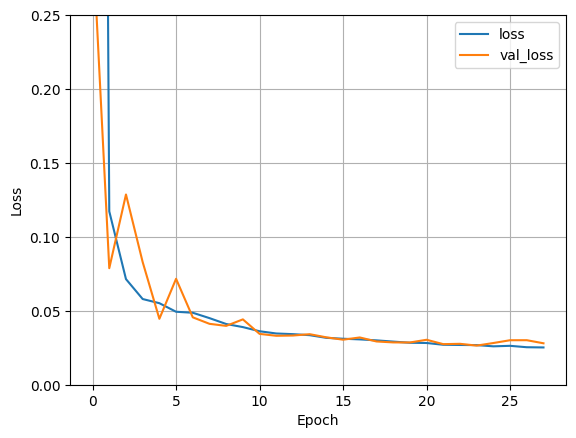

In [128]:
plt.plot(history2.history['loss'], label='loss')
plt.plot(history2.history['val_loss'], label='val_loss')
plt.ylim([0, 0.25])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [129]:
emb = model2.get_weights()[0]
emb

array([[ 2.0574074 , -2.0615642 ],
       [ 1.8155682 , -1.7574838 ],
       [ 3.197487  , -3.3564944 ],
       [ 1.8807156 , -1.8600314 ],
       [ 4.3685923 , -4.4924498 ],
       [ 5.1091375 , -5.0174193 ],
       [ 1.9494665 , -1.937819  ],
       [ 3.1515062 , -3.3325577 ],
       [ 0.60909027, -0.5121473 ],
       [ 1.0655328 , -1.1628801 ]], dtype=float32)

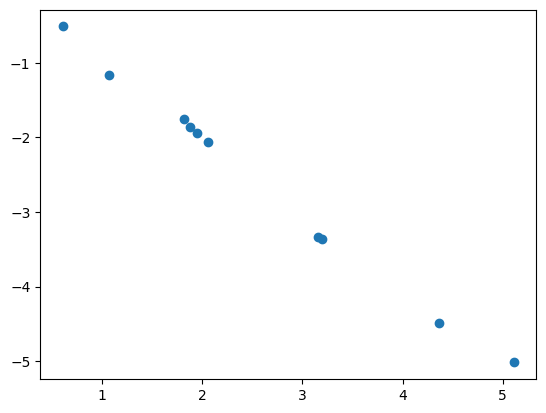

In [130]:
plt.scatter(emb[:, 0], emb[:, 1])
plt.show()

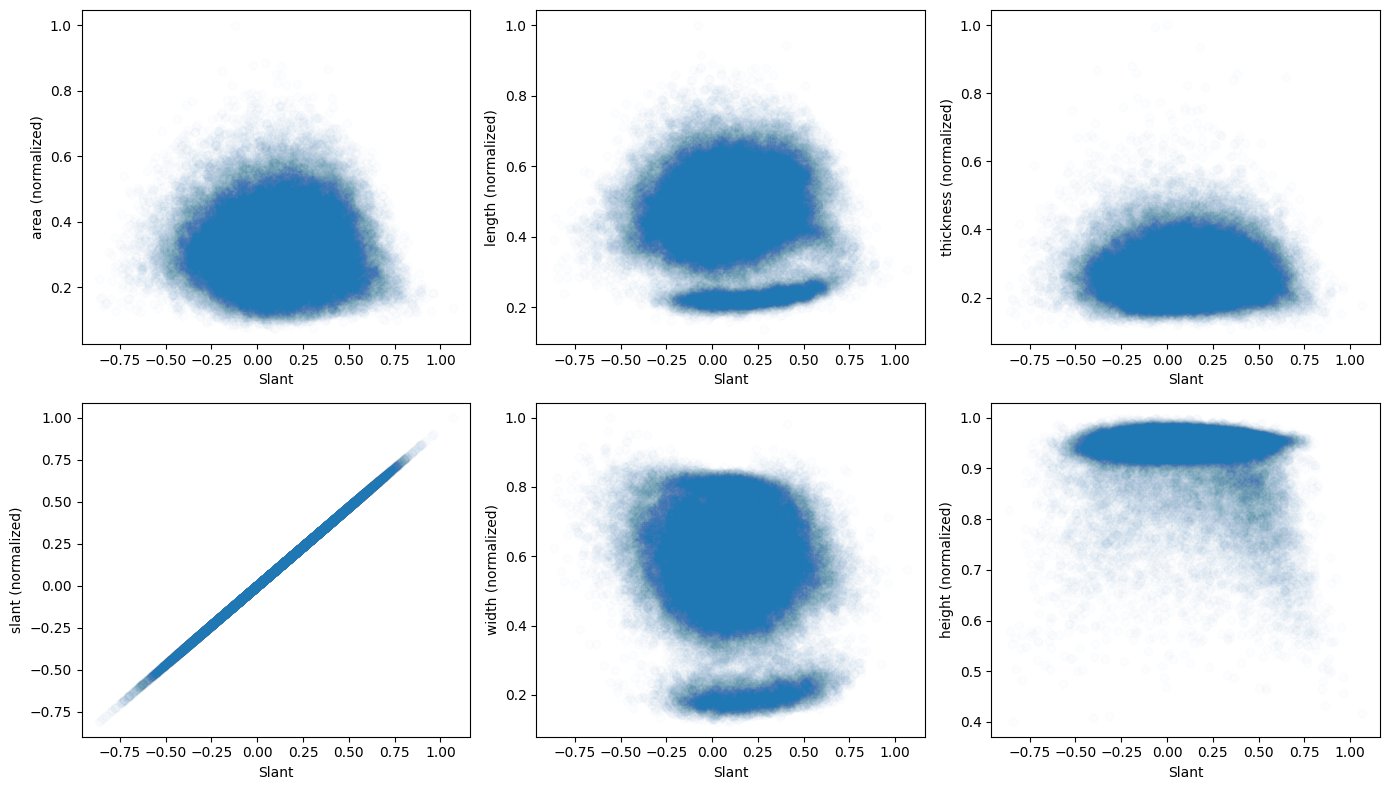

In [91]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(14, 8))

for idx, (label, data) in enumerate(train_morpho.items()):
    if idx:
        (row, col) = (0, idx-1) if idx < 4 else (1, idx-4) 
        ax[row, col].scatter(train_morpho['slant'], data/max(data), alpha=0.01)
        ax[row, col].set_xlabel('Slant')
        ax[row, col].set_ylabel(label + ' (normalized)')

fig.tight_layout()
plt.show()

In [118]:
p3input1 = Input(shape=(28, 28))

p3input2 = Input(shape=(1,))

p3relu2 = Dense(1, activation='linear')(p3input2)

p3relu2 = Model(inputs=p3input2, outputs=p3relu2)

p3second = Flatten(input_shape=(28, 28))(p3input1)

p3second = Model(inputs=p3input1, outputs=p3second)

p3merged = Concatenate()([p3relu2.output, p3second.output])

p3act1 = Dense(786//2, activation='relu')(p3merged)

p3norm1 = BatchNormalization(synchronized=True)(p3act1)

p3act2 = Dense(786//4, activation='relu')(p3norm1)

p3norm2 = BatchNormalization(synchronized=True)(p3act2)

p3output = Dense(1)(p3norm2)

model3 = Model(inputs=[p3relu2.input, p3second.input], outputs=p3output)

model3.summary()

Model: "model_20"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_14 (InputLayer)          [(None, 1)]          0           []                               
                                                                                                  
 input_13 (InputLayer)          [(None, 28, 28)]     0           []                               
                                                                                                  
 dense_73 (Dense)               (None, 1)            2           ['input_14[0][0]']               
                                                                                                  
 flatten_24 (Flatten)           (None, 784)          0           ['input_13[0][0]']               
                                                                                           

In [119]:
h = train_morpho['length'].to_numpy()
saltear, saltear2, h_train, h_val = train_test_split(x_trainp, h/max(h), test_size=0.25, random_state=42)

In [120]:
stp = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

model3.compile(loss='MAE', optimizer=Adam(learning_rate=0.001))
history3 = model3.fit(x = [h_train, x_train], y = s_train, validation_data = ([h_val, x_val], s_val), epochs=100, batch_size=32, callbacks=[stp])

Epoch 1/100
1407/1407 [==============================] - 15s 10ms/step - loss: 0.1496 - val_loss: 0.0529
Epoch 2/100
1407/1407 [==============================] - 13s 10ms/step - loss: 0.0573 - val_loss: 0.0400
Epoch 3/100
1407/1407 [==============================] - 14s 10ms/step - loss: 0.0526 - val_loss: 0.0364
Epoch 4/100
1407/1407 [==============================] - 14s 10ms/step - loss: 0.0503 - val_loss: 0.0264
Epoch 5/100
1407/1407 [==============================] - 14s 10ms/step - loss: 0.0486 - val_loss: 0.0361
Epoch 6/100
1407/1407 [==============================] - 14s 10ms/step - loss: 0.0460 - val_loss: 0.0292
Epoch 7/100
1407/1407 [==============================] - 14s 10ms/step - loss: 0.0450 - val_loss: 0.0228
Epoch 8/100
1407/1407 [==============================] - 14s 10ms/step - loss: 0.0449 - val_loss: 0.0202
Epoch 9/100
1407/1407 [==============================] - 14s 10ms/step - loss: 0.0422 - val_loss: 0.0197
Epoch 10/100
1407/1407 [==============================]

In [116]:
y3 = model3.predict([h_val, x_val])

469/469 [==============================] - 1s 3ms/step


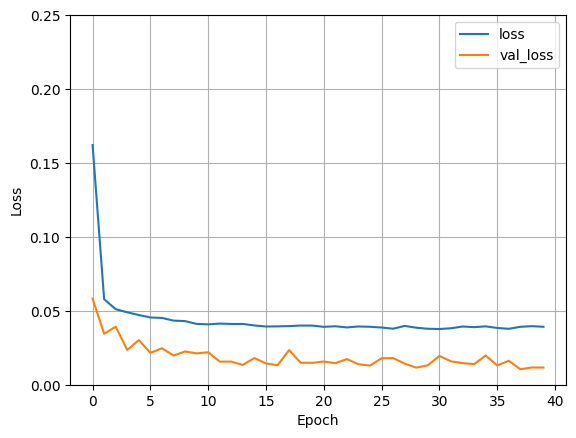

In [117]:
plt.plot(history3.history['loss'], label='loss')
plt.plot(history3.history['val_loss'], label='val_loss')
plt.ylim([0, 0.25])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()